# Enrichment process

In this process we will recived the affinity full calculations as input and then process it to establish the gene-side effect associations.

### 1. Applying cut-off values (pI)

In [76]:
#Needed libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

In [81]:
#opening the files
#affinity_file  = '..\affinity_full_.csv'
affinity_file  = 'affinity_full_toy.csv'

affinity = pd.read_csv(affinity_file, sep=',')

In [82]:
affinity

,DrugID,GeneID,pI,SMILES,Sequence,pKd,filtered
0,143,233,6.30,C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C...,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,5.33,0.00
1,143,412,5.57,C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C...,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...,5.32,5.32
2,143,1008,5.35,C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C...,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...,4.84,4.84
3,143,1146,8.68,C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C...,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...,5.43,0.00
4,143,2125,8.47,C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C...,MSVLLRSGLGPLCAVARAAIPFIWRGKYFSSGNEPAENPVTPMLRH...,5.59,0.00
...,...,...,...,...,...,...,...
6205,2955,233055,6.99,C1=CC(=CC=C1N)S(=O)(=O)C2=CC=C(C=C2)N,MAAEIHSRPQSSRPVLLSKIEGHQDAVTAALLIPKEDGVITASEDR...,4.04,0.00
6206,2955,233057,8.58,C1=CC(=CC=C1N)S(=O)(=O)C2=CC=C(C=C2)N,MAGDLSAGFFMEELNTYRQKQGVVLKYQELPNSGPPHDRRFTFQVI...,5.07,0.00
6207,2955,233078,8.73,C1=CC(=CC=C1N)S(=O)(=O)C2=CC=C(C=C2)N,MNNSGADEIGKLFVGGLDWSTTQETLRSYFSQYGEVVDCVIMKDKT...,4.54,0.00
6208,2955,233099,6.77,C1=CC(=CC=C1N)S(=O)(=O)C2=CC=C(C=C2)N,MELAHSLLLNEEALAQITEAKRPVFIFEWLRFLDKVLVAANKTDVK...,4.55,0.00


In [83]:
#converting the affinity values to numeric
affinity['pKd'] = pd.to_numeric(affinity['pKd'])
affinity.dtypes

DrugID        int64
GeneID        int64
pI          float64
SMILES       object
Sequence     object
pKd         float64
filtered    float64
dtype: object

In [84]:
#Define a new filterd column
affinity['filtered'] = '-'

#Filtering affinities with pI
for i in range(len(affinity)):
    
    if affinity['pKd'][i] > affinity['pI'][i]*0.9:        # pKd > pI & 10% CI
        affinity['filtered'][i] = affinity['pKd'][i]
    else:
        affinity['filtered'][i] = 0

#print the results
affinity[['pI','pKd','filtered']]


D:\Application\Anaconda\envs\DeepPurpose\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Application\Anaconda\envs\DeepPurpose\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pI,pKd,filtered
0,6.30,5.33,0
1,5.57,5.32,5.32
2,5.35,4.84,4.84
3,8.68,5.43,0
4,8.47,5.59,0
...,...,...,...
6205,6.99,4.04,0
6206,8.58,5.07,0
6207,8.73,4.54,0
6208,6.77,4.55,0


In [85]:
#Filteration rate
filter_rate = len(affinity.loc[affinity['filtered'] == 0])/len(affinity)
print('The filteration rate is {:%} .'.format(filter_rate))

The filteration rate is 66.553945% .


In [86]:
#Dropes the pKd = 0
affinity_cut = affinity.loc[affinity['filtered'] != 0]
affinity_cut[['DrugID','GeneID']]
#affinity_cut[['DrugID','GeneID']].to_csv('affinity_cut.csv', index=False, sep = ',')

,DrugID,GeneID
1,143,412
2,143,1008
5,143,2165
10,143,3302
17,143,5286
...,...,...
6168,2955,231487
6184,2955,232165
6201,2955,232975
6202,2955,232978


#### 1.2 Visuizations DTIs

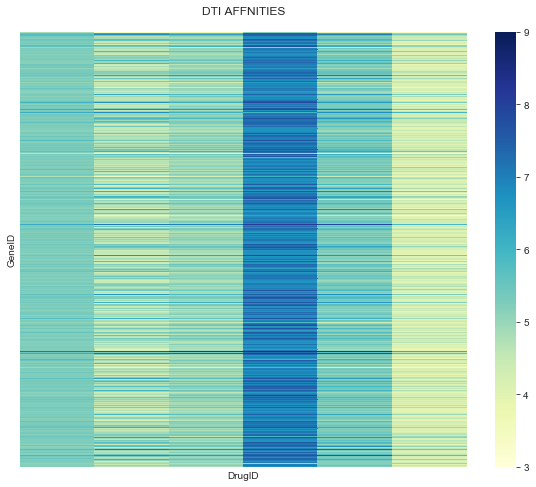

In [88]:
DTI = affinity.pivot(index="GeneID", columns="DrugID", values="pKd")
DTI
#sns.set_style('whitegrid')

# Sample figsize in inches
fig, ax = plt.subplots(figsize=(10,8))         

# title
plt.title('DTI affnities\n'.upper(), loc='center')
DTI_fig = sns.heatmap(DTI,  cmap='YlGnBu',xticklabels=False, 
                          yticklabels=False, vmin=3, vmax=9, ax=ax)
DTI_fig.figure.savefig("DTI.png")

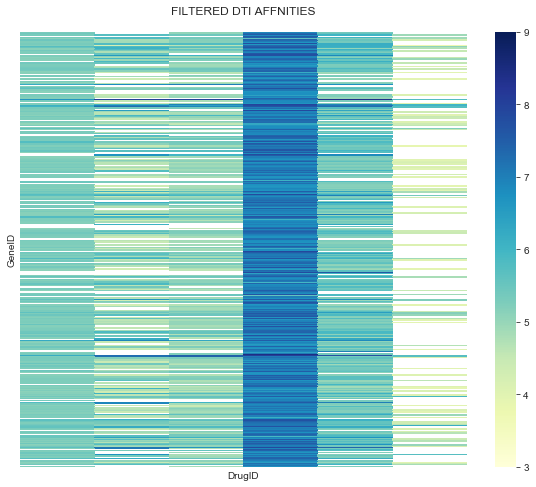

In [61]:
DTI_cut = affinity_cut.pivot(index="GeneID", columns="DrugID", values="pKd")
DTI_cut

# Sample figsize in inches
fig, ax = plt.subplots(figsize=(10,8))         

# title
plt.title('Filtered DTI affnities\n'.upper(), loc='center')
DTI_cut_fig = sns.heatmap(DTI_cut, cmap='YlGnBu',xticklabels=False, yticklabels=False, vmin=3, vmax=9, ax=ax)
DTI_cut_fig.figure.savefig("DTI_cut")

In [62]:
DTI_cut

DrugID,143,2802,2914,2949,2951,2955
GeneID,,,,,,
233,NaN,NaN,NaN,6.91,NaN,NaN
412,5.32,NaN,5.04,6.91,5.39,NaN
1008,4.84,NaN,NaN,5.19,NaN,NaN
2165,5.43,NaN,NaN,7.29,5.54,NaN
3302,5.33,5.72,5.46,7.50,6.01,4.93
...,...,...,...,...,...,...
232978,5.20,5.34,5.07,7.23,5.58,4.47
233047,5.40,5.74,5.67,7.62,5.99,4.84
233055,NaN,NaN,NaN,6.96,NaN,NaN


### 2. Enrichment process

In [53]:
#opening the full files
DTI_file  = '..\DTI_cut.csv'
SE_file  = '..\se_all.csv'

DTI_full_cut = pd.read_csv(DTI_file,index_col=0, sep=',')
SE_all = pd.read_csv(SE_file, sep=',')

In [54]:
DTI_full_cut = DTI_full_cut.notnull().astype('int') #replaces non-NA with 1 and NA with 0
DTI_full_cut.to_csv('DTI_matrix.csv', sep = ',')
DTI_full_cut


,85,119,137,143,146,158,159,160,175,187,...,53627505,54677977,54681041,54682541,54687131,56603655,56842239,70683024,70695640,71306834
GeneID,,,,,,,,,,,,,,,,,,,,,
9606.ENSP00000000233,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9606.ENSP00000000412,0,0,0,1,1,0,1,1,0,1,...,0,1,0,1,1,0,0,0,0,1
9606.ENSP00000001008,0,0,0,1,1,0,1,1,0,1,...,0,1,0,1,1,0,0,0,0,1
9606.ENSP00000001146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9606.ENSP00000002125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9606.ENSP00000485671,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9606.ENSP00000485672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9606.ENSP00000485673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
SE_all

,DrugID,SEID,SE name
0,CID100000085,C0000729,Abdominal cramps
1,CID100000085,C0000737,Abdominal pain
2,CID100000085,C0151736,Accidental injury
3,CID100000085,C0002418,Amblyopia
4,CID100000085,C0002871,Anaemia
...,...,...,...
138894,CID171306834,C0042963,Vomiting
138895,CID171306834,C3665596,Warts
138896,CID171306834,C0043096,Weight decreased
138897,CID171306834,C0043094,Weight increased


In [56]:
SE = SE_all.pivot(index="DrugID", columns="SE name", values="SEID")
SE = SE.notnull().astype('int') #replaces non-NA with 1 and NA with 0
SE.to_csv('SE_matrix.csv', sep = ',')
SE

SE name,5'nucleotidase increased,AGEP,AIDS dementia complex,AION,AML progression,ANA increased,Abasia,Abdominal abscess,Abdominal adhesions,Abdominal aortic aneurysm,...,Xerophthalmia,Xerosis,Yawning,Yeast infection,Yellow nail syndrome,Yellow skin,Zinc deficiency,Zollinger-Ellison syndrome,pH urine decreased,pH urine increased
DrugID,,,,,,,,,,,,,,,,,,,,,
CID100000085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID100000119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID100000137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID100000143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID100000146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CID156603655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID156842239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID170683024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#making matrices
SE_matrix = SE.to_numpy()
DTI_matrix = DTI_full_cut.to_numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

#### 2.1 Making the gene-side effect (GSE) matrix

In [65]:
%%time
# GSE = DTI x SE
# 19555*5085 = 19555*1430 x 1430*5085
GSE_matrix = np.matmul(DTI_matrix,SE_matrix)

Wall time: 7min 24s


In [71]:
GSE_full = pd.DataFrame(GSE_matrix, columns=list(SE.columns), index=list(DTI_full_cut.index))
GSE_full.to_csv('GSE_full.csv', sep = ',')
GSE_full

,5'nucleotidase increased,AGEP,AIDS dementia complex,AION,AML progression,ANA increased,Abasia,Abdominal abscess,Abdominal adhesions,Abdominal aortic aneurysm,...,Xerophthalmia,Xerosis,Yawning,Yeast infection,Yellow nail syndrome,Yellow skin,Zinc deficiency,Zollinger-Ellison syndrome,pH urine decreased,pH urine increased
9606.ENSP00000000233,0,1,1,1,0,0,1,0,0,0,...,10,2,19,0,0,2,0,0,0,0
9606.ENSP00000000412,0,2,1,3,1,1,1,1,0,0,...,12,4,32,0,0,4,0,0,0,1
9606.ENSP00000001008,0,2,1,3,1,1,1,1,0,0,...,16,4,33,0,0,4,0,0,0,1
9606.ENSP00000001146,0,0,0,0,0,0,0,0,0,0,...,1,0,3,0,0,0,0,0,0,0
9606.ENSP00000002125,0,0,0,1,0,0,0,0,0,0,...,3,0,6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9606.ENSP00000485671,0,1,1,1,0,0,0,0,0,0,...,7,1,14,0,0,1,0,0,0,0
9606.ENSP00000485672,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9606.ENSP00000485673,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
9606.ENSP00000485675,1,3,1,4,1,2,1,2,1,1,...,26,6,42,2,1,4,1,1,1,1


In [78]:
GSE_info = GSE_full.describe()
#GSE_info.to_csv('GSE_info.csv', sep = ',')
GSE_info

,5'nucleotidase increased,AGEP,AIDS dementia complex,AION,AML progression,ANA increased,Abasia,Abdominal abscess,Abdominal adhesions,Abdominal aortic aneurysm,...,Xerophthalmia,Xerosis,Yawning,Yeast infection,Yellow nail syndrome,Yellow skin,Zinc deficiency,Zollinger-Ellison syndrome,pH urine decreased,pH urine increased
count,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,...,19555.000000,19555.000000,19555.00000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000
mean,0.156277,1.082434,0.623984,1.638762,0.251036,0.399693,0.461161,0.401125,0.101457,0.181181,...,8.592636,1.960675,17.51102,0.108208,0.042905,1.788750,0.157300,0.173511,0.172897,0.280593
std,0.363127,1.037871,0.484397,1.453838,0.433620,0.607646,0.498502,0.592458,0.301941,0.385178,...,7.094134,2.044693,14.58109,0.443783,0.202647,1.814254,0.364093,0.378698,0.378168,0.449301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,1.000000,18.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,13.000000,4.000000,32.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,26.000000,6.000000,42.00000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
GSE_transposed = GSE_full.transpose()
GSE_info2 = GSE_transposed.describe()
#GSE_info.to_csv('GSE_info.csv', sep = ',')
GSE_info2

,9606.ENSP00000000233,9606.ENSP00000000412,9606.ENSP00000001008,9606.ENSP00000001146,9606.ENSP00000002125,9606.ENSP00000002165,9606.ENSP00000002596,9606.ENSP00000002829,9606.ENSP00000003084,9606.ENSP00000003100,...,9606.ENSP00000485656,9606.ENSP00000485659,9606.ENSP00000485663,9606.ENSP00000485664,9606.ENSP00000485668,9606.ENSP00000485671,9606.ENSP00000485672,9606.ENSP00000485673,9606.ENSP00000485675,9606.ENSP00000485678
count,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000,...,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000
mean,8.447890,14.094746,15.025151,0.918691,1.774505,12.178295,0.591731,1.364513,0.885271,1.159001,...,0.507838,8.920413,12.061843,1.987769,0.505943,5.497158,0.112145,0.274246,23.927476,1.506460
std,26.987322,45.400446,48.264780,2.693754,5.239078,39.379383,1.957526,4.035778,2.697779,3.439350,...,1.657475,28.747682,39.004649,5.893643,1.650400,17.668775,0.523729,0.961474,78.159453,4.527826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000
75%,4.000000,7.000000,7.000000,1.000000,1.000000,6.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,4.000000,6.000000,1.000000,0.000000,3.000000,0.000000,0.000000,11.000000,1.000000
max,399.000000,684.000000,730.000000,33.000000,70.000000,592.000000,26.000000,52.000000,34.000000,41.000000,...,21.000000,431.000000,588.000000,83.000000,21.000000,254.000000,7.000000,15.000000,1207.000000,60.000000


In [107]:
GSE_info2.T.to_csv('GSE_info2.csv', sep = ',')